In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('swiggy_all_menus_india.csv')
data = df.copy()

In [3]:
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [4]:
copy = df.copy()

#### Different types of recommendations that can be made

In [8]:
#### Let's separate cities and check individual data(I chose Hyderabad)
hyd = df[df['City'] == 'Hyderabad']

We are trying to find insights that are helpful for both swiggy and restaurant that include famous food items by location and prices of those items.

In [ ]:
print('Total different locations in which restaurants are listed in swiggy: ',len(hyd['Location'].unique()))
print('Total different categories of food items in those restaurants: ',len(hyd['Category'].unique()))



Total different locations in which restaurants are listed in swiggy:  60
Total different categories of food items in those restaurants:  546


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Restaurant Name  197430 non-null  object 
 3   Location         197430 non-null  object 
 4   Category         197430 non-null  object 
 5   Dish Name        197430 non-null  object 
 6   Price (INR)      197430 non-null  float64
 7   Rating           197430 non-null  float64
 8   Rating Count     197430 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 13.6+ MB


In [5]:
print('Different types of dishes(items) available: ',len(df['Dish Name'].unique()))

Different types of dishes(items) available:  59064


In [6]:
print(df['Restaurant Name'].value_counts())
print(df['Category'].unique())

Restaurant Name
McDonald's                    13530
KFC                           12961
Burger King                    7116
Pizza Hut                      6529
Domino's Pizza                 5492
                              ...  
Hungry Point                      2
Barq Foods                        1
Royal Kitchen                     1
Talk Of The Town (Bt Road)        1
Anand Sweets & Savouries          1
Name: count, Length: 993, dtype: int64
['Snack' 'Recommended' 'North Indian Gravy' ... 'Chicken Momo'
 'Chicken Rice' 'make your own combo']


In [7]:
print('Total categories available are: ',len(df['Category'].unique()))

Total categories available are:  4972


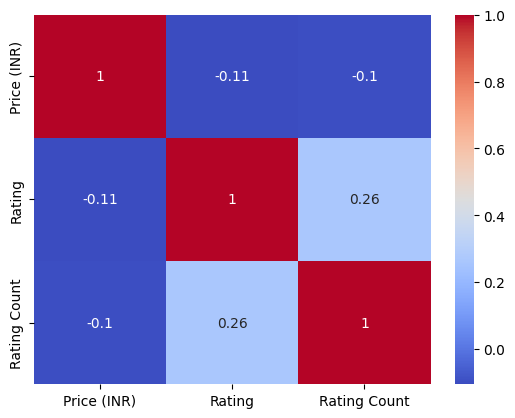

In [8]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [9]:
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [10]:
#We will see restaurant vs avg price and category vs avg price
print('Total no.of restaurants in Bangalore that are partnered with Swiggy: ',len(df['Restaurant Name'].unique()))
print('Total no.of categories in all restaurants: ',len(df['Category'].unique()))

Total no.of restaurants in Bangalore that are partnered with Swiggy:  993
Total no.of categories in all restaurants:  4972


As we can see there are too many to display on the plot.So let us consider top 10 luxury restaurants(high avg price is considered)

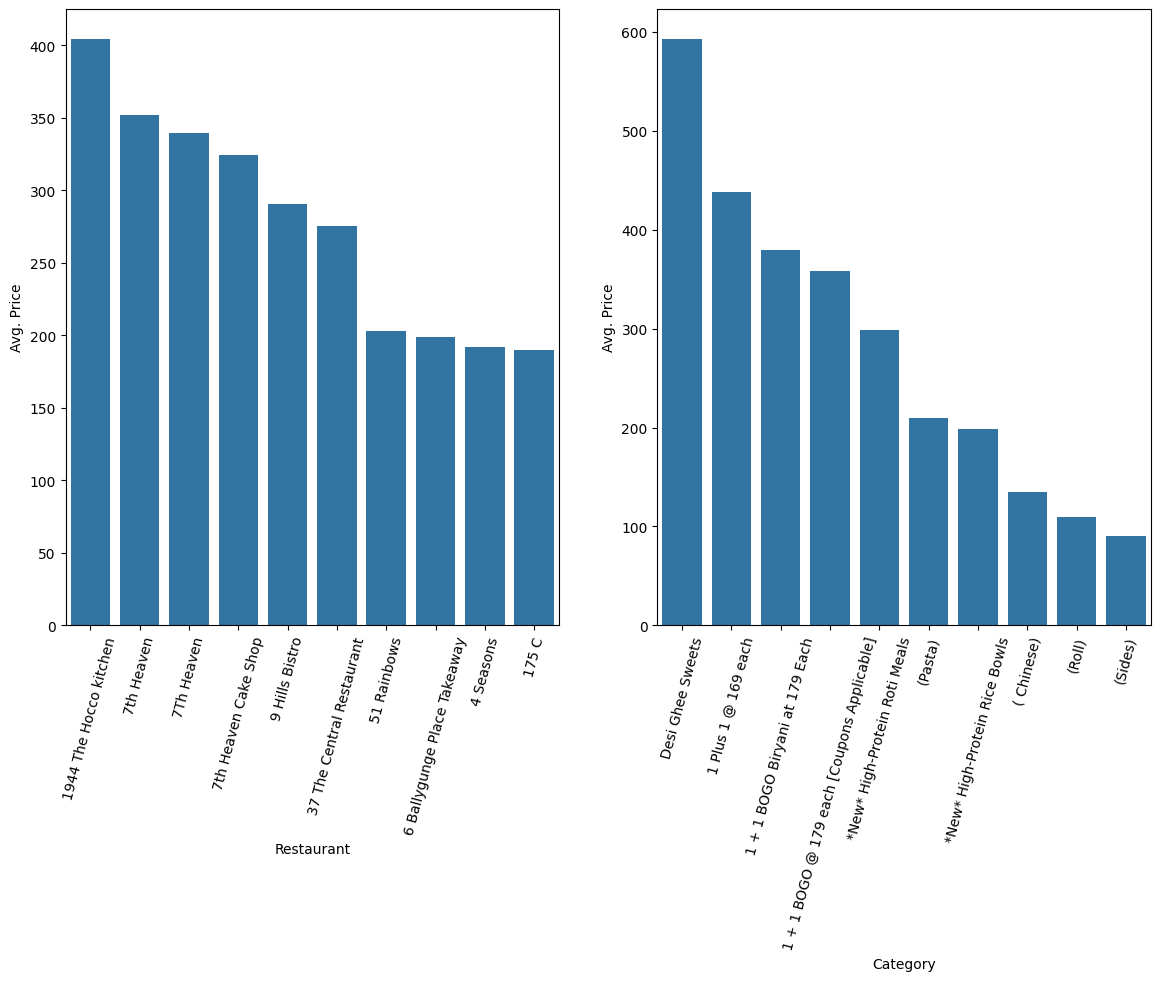

In [11]:
luxury_df = df.groupby('Restaurant Name')['Price (INR)'].mean().reset_index().head(10).sort_values(by='Price (INR)',ascending=False)
best_category_df = df.groupby('Category')['Price (INR)'].mean().reset_index().head(10).sort_values(by='Price (INR)',ascending=False)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.barplot(x='Restaurant Name',y='Price (INR)',data=luxury_df)
plt.xlabel('Restaurant')
plt.ylabel('Avg. Price')
plt.xticks(rotation=75)
plt.subplot(1,2,2)
sns.barplot(x='Category',y='Price (INR)',data=best_category_df)
plt.xlabel('Category')
plt.ylabel('Avg. Price')
plt.xticks(rotation=75)
plt.show() 

##### Data distribution of 'PRICE', 'RATING' and 'RATING COUNT'

In [25]:
df.sample(5)
# We can use df.drop_duplicates(subset='Req_col_name') to get separate dataset with unique records of that particular column
unique_dishes = df.drop_duplicates(subset='Dish Name')
num_df = unique_dishes.select_dtypes(include='number')

In [27]:
print('The maximum price of a dish: ',num_df['Price (INR)'].max())
print('The maximum rating for a dish: ',num_df['Rating'].max())
print('The maximum ratings given to a dish: ',num_df['Rating Count'].max())

The maximum price of a dish:  8000.0
The maximum rating for a dish:  5.0
The maximum ratings given to a dish:  997


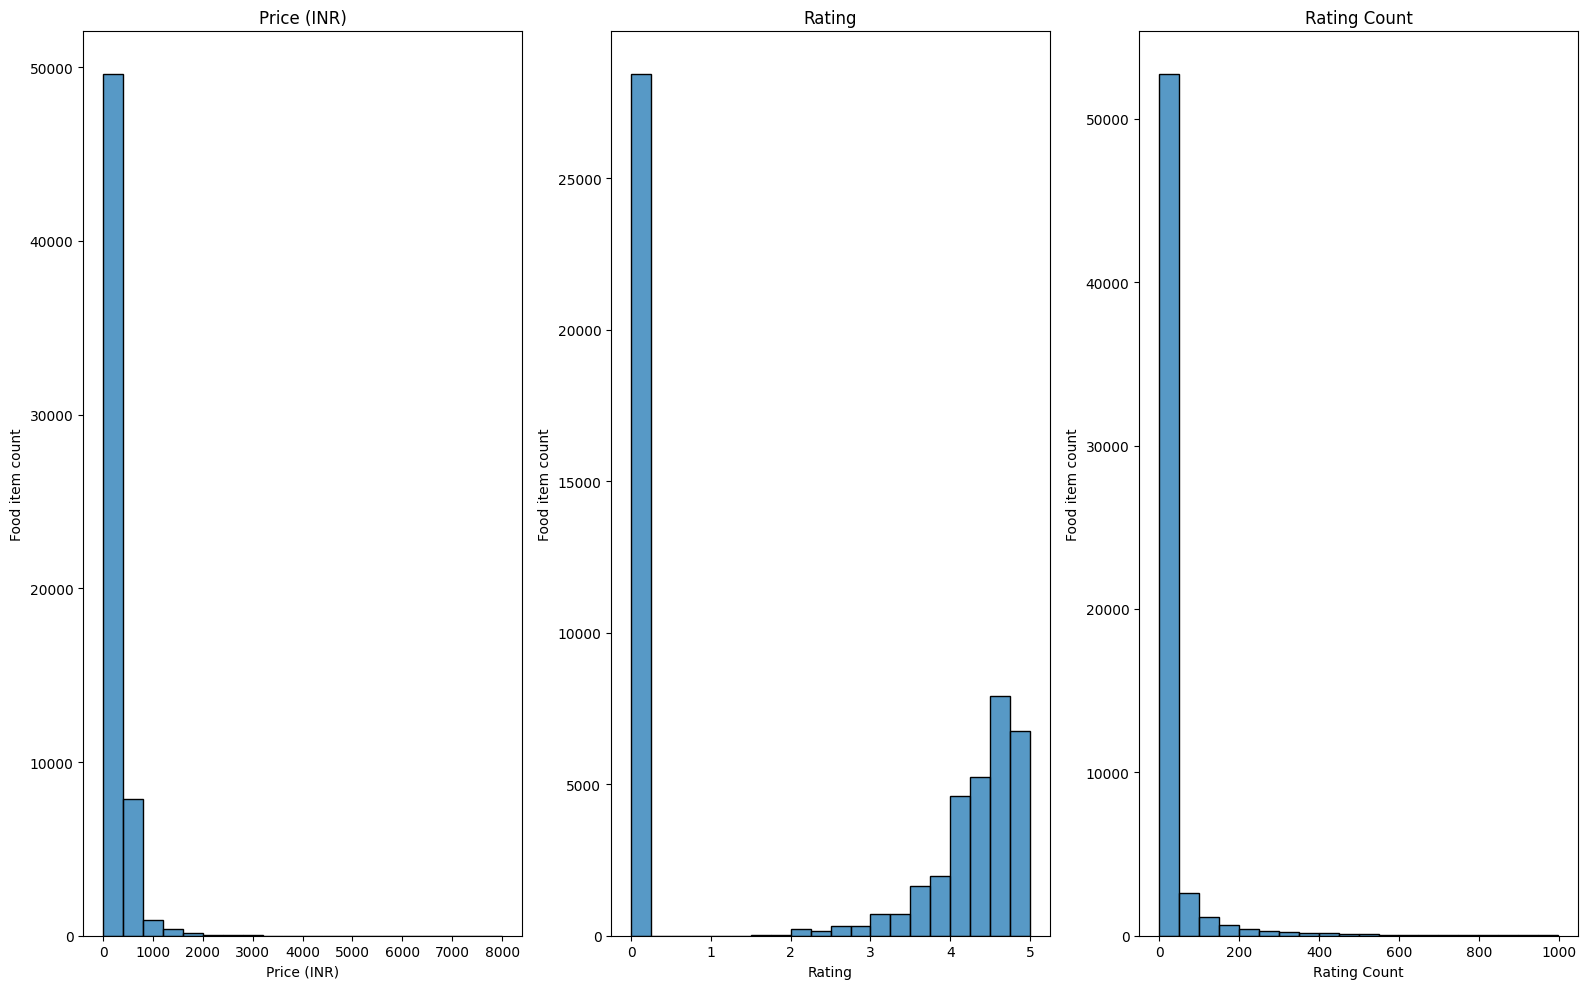

In [26]:
n_col = 3
n_row = int(np.ceil(len(num_df.columns)/n_col))
plt.figure(figsize=(16,10))
for i,col in enumerate(num_df.columns,1):
    plt.subplot(n_row,n_col,i)
    sns.histplot(num_df[col],bins=20)
    plt.ylabel('Food item count')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [28]:
#Let's see the top 10 most expensive dishes
expensive_df = df.groupby('Dish Name')['Price (INR)'].mean().reset_index().sort_values(by='Price (INR)',ascending=False)
expensive_df.head(10)

,Dish Name,Price (INR)
15990,Choley Bhature Classic Combo (for 20),8000.0
50829,Special Deluxe Thali Feast (for 15),7725.0
15989,Choley Bhature Classic Combo (for 15),6000.0
50828,Special Deluxe Thali Feast (for 10),5400.0
42573,Party Menu Plan I,4799.0
52814,T20 Thunder Combo ( Serves 12) ( Non Veg ),4652.0
54709,Trophy Celebration Combo ( Serves 12 ) ( Veg),4328.0
15988,Choley Bhature Classic Combo (for 10),4000.0
37770,Mutton Standard Pack,3900.0
53982,Thalappakatti Naidu Mutton Biryani Party Bucke...,3884.0


In [29]:
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


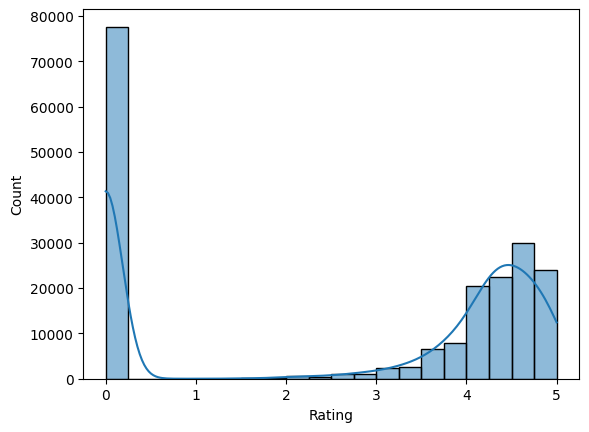

In [30]:
sns.histplot(x='Rating',data=df,bins=20,kde=True)
plt.show()

In [31]:
rating_0 = df[df['Rating']==0]
No_ratings = rating_0['Rating Count'].value_counts()
print('Total items that are not rated by customers: ',No_ratings[0])
print('Total no.of items that are rated are: ',df.shape[0]-No_ratings[0])
rated_count = df.shape[0]-No_ratings[0]
non_rated_count = No_ratings[0]
ratings = pd.DataFrame({'Status':['rated','not rated'],'Count':[rated_count,non_rated_count]})
ratings

Total items that are not rated by customers:  77644
Total no.of items that are rated are:  119786


,Status,Count
0,rated,119786
1,not rated,77644


##### It is clear that ~80000 items are not rated by customers

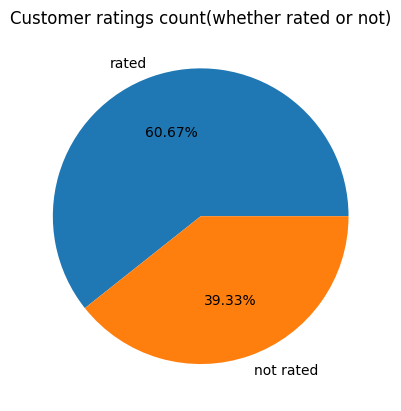

In [32]:
#Let's see this in a pie chart
plt.pie(ratings['Count'],labels=ratings['Status'],autopct='%1.2f%%')
plt.title('Customer ratings count(whether rated or not)')
plt.show()

In [33]:
data.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [34]:
df['City'].value_counts()

City
Bengaluru      20077
Mumbai         10507
Hyderabad      10309
Jaipur         10286
Lucknow        10192
New Delhi      10191
Ahmedabad      10185
Chandigarh     10065
Kolkata        10046
Chennai        10042
Indore          7476
Shillong        5183
Ranchi          5101
Dehradun        5084
Shimla          5054
Guwahati        5032
Panaji          5030
Kochi           5029
Raipur          5025
Bhubaneswar     5018
Agartala        5006
Gurgaon         5005
Imphal          5003
Srinagar        5002
Patna           5000
Aizawl          3091
Kohima          2286
Gangtok         2105
Name: count, dtype: int64

##### We'll separate metro cities and work on it

In [35]:
metro_df = df[df['City'].isin(['Bengaluru','Mumbai','Chennai','Gurgaon','hyderabal','New Delhi','Jaipur','Ahmedabad','Kolkata'])]
metro_df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


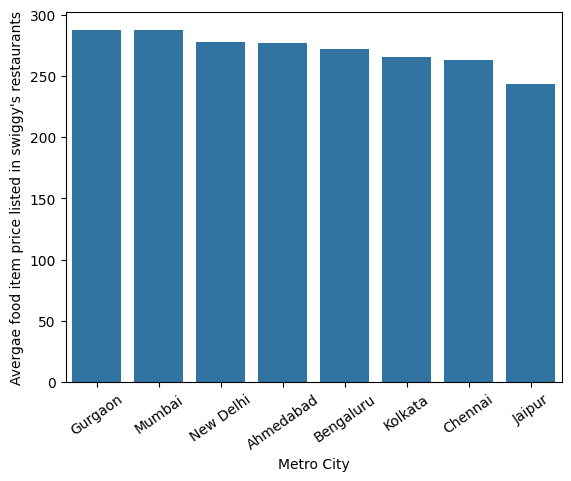

In [36]:
#Avergae prices in these metro cities
metro_prices  = metro_df.groupby('City')['Price (INR)'].mean().sort_values(ascending=False)
sns.barplot(x=metro_prices.index,y=metro_prices.values)
plt.xticks(rotation=35)
plt.xlabel('Metro City')
plt.ylabel('Avergae food item price listed in swiggy\'s restaurants')
plt.show()

In [37]:
restaurants = metro_df.groupby('City')['Restaurant Name'].value_counts().reset_index()

In [38]:
data.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [39]:
len(data['Restaurant Name'].unique())

993

In [40]:
bangalore_df = data[data['City'] == 'Bengaluru']
bangalore_df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [41]:
bangalore_df.shape

(20077, 9)

Total restaurants listed in swiggy app:  88


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bismillah Taj Hotel'),
  Text(1, 0, 'Sri Vinayaka Hot Chips'),
  Text(2, 0, 'The Idli Foundry'),
  Text(3, 0, "Brahmins' Thatte Idli"),
  Text(4, 0, 'Majaa Thindi'),
  Text(5, 0, 'Royal Indraprastha'),
  Text(6, 0, 'Tiffin Story'),
  Text(7, 0, 'Anand Sweets & Savouries'),
  Text(8, 0, 'Hotel Annalakshmi'),
  Text(9, 0, 'Udupi Grand')])

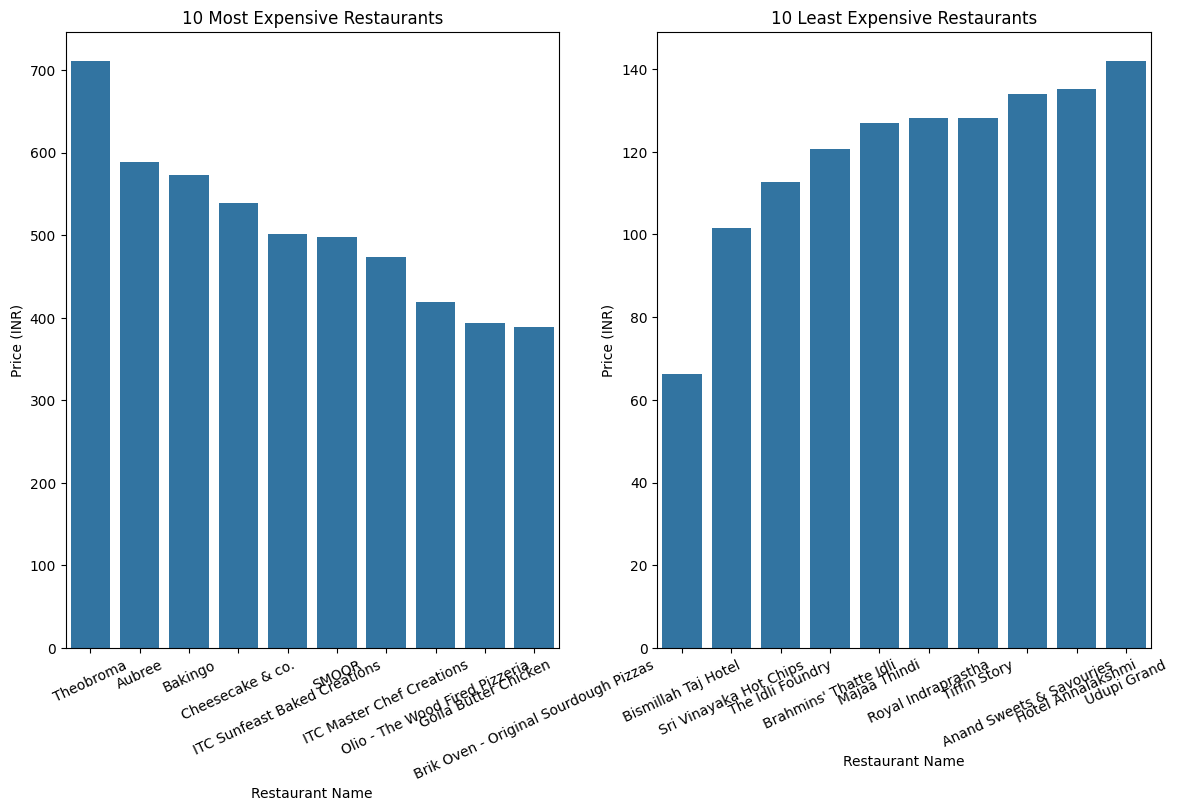

In [42]:
#Total restaurants listed in swiggy app
print('Total restaurants listed in swiggy app: ',len(bangalore_df['Restaurant Name'].unique()))
#Average price at those restaurants: most expensive and least expensive 10 restaurants
most_exp = bangalore_df.groupby('Restaurant Name')['Price (INR)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.barplot(x='Restaurant Name',y='Price (INR)',data=most_exp.head(10))
plt.title('10 Most Expensive Restaurants')
plt.xticks(rotation=25)
plt.subplot(1,2,2)
sns.barplot(x='Restaurant Name',y='Price (INR)',data=most_exp.tail(10).sort_values(by='Price (INR)',ascending=True))
plt.title('10 Least Expensive Restaurants')
plt.xticks(rotation=25)

In [43]:
df.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [45]:
hyd_df = df[df['City']=='Hyderabad']
hyd_df.sample(5)

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
31372,Telangana,Hyderabad,Home Plate by EatFit,Gandipet Mandal,Pav Meals@99,Pav with Kala Channa,119.0,0.0,0
35082,Telangana,Hyderabad,McDonald's Gourmet Burger Collection,Narapally,Coffee & Beverages (Hot and Cold),Strawberry Shake,185.0,0.0,0
33785,Telangana,Hyderabad,Bikanervala,aramghar,Vegetable Curries,Chat Pata Barwan Aloo,430.0,0.0,0
31187,Telangana,Hyderabad,Ovenfresh Cakes And Desserts,VATTINAGULAPALLI,Brownies & Choco Lava,Double Chocolate Brookie,149.0,0.0,0
85547,Telangana,Hyderabad,The Airawat Kitchen,Miyapur,Starters,Chilli Paneer,329.0,0.0,0


In [60]:
rich_locations = hyd_df.groupby('Location')[['Price (INR)','Rating']].agg({'Price (INR)':'mean','Rating':'mean'}).sort_values(by='Price (INR)', ascending=False).reset_index().head(10)

In [61]:
rich_locations

,Location,Price (INR),Rating
0,Kokapet,1475.113636,1.453409
1,Gachibowli,698.452589,3.214714
2,shamshabaad,564.909091,0.932468
3,Lingampally & Nallagandla,463.072368,3.893421
4,Attapur,436.372328,2.523276
5,ICRISAT Colony,417.500000,0.685000
6,RANGAREDDY,397.093333,3.315333
7,PEERZADIGUDA,321.860169,0.795763
8,Gandipet,316.700000,3.370000
9,Narepally,313.217279,3.437415


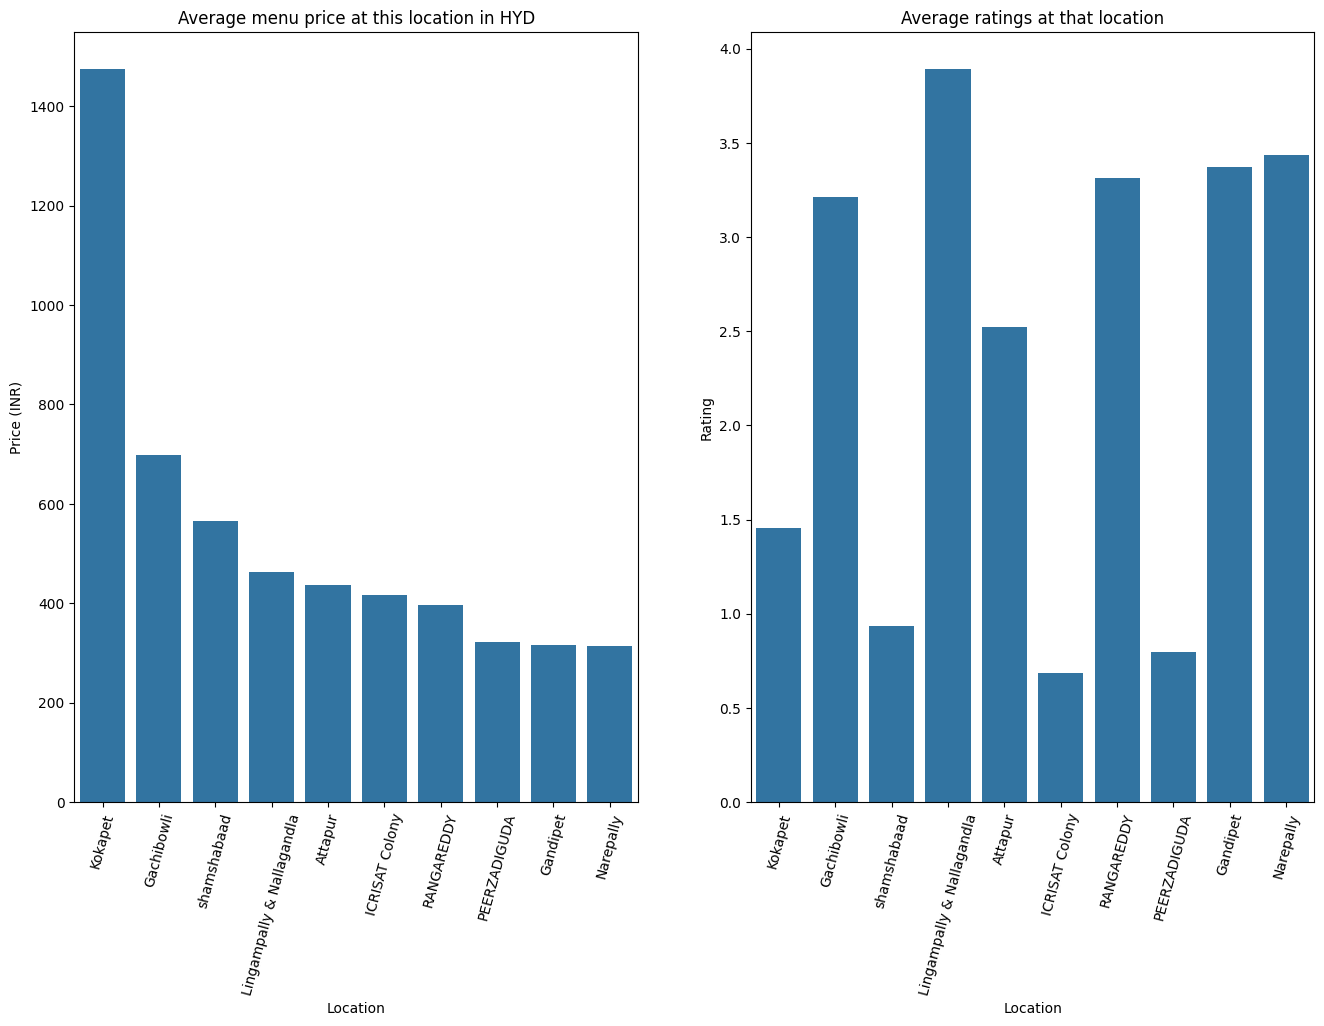

The city average ratings for restaurant items:  2.7406634979144435
The city average no.of people that actually give any rating:  28.576389562518187


In [64]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.barplot(x=rich_locations['Location'],y=rich_locations['Price (INR)'])
plt.title('Average menu price at this location in HYD')
plt.xticks(rotation=75)
plt.subplot(1,2,2)
sns.barplot(x=rich_locations['Location'],y=rich_locations['Rating'])
plt.title('Average ratings at that location')
plt.xticks(rotation=75)
plt.show()
print('The city average ratings for restaurant items: ',hyd_df['Rating'].mean())
print('The city average no.of people that actually give any rating: ',hyd_df['Rating Count'].mean())

In [69]:
df.sample(10)

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
196692,Sikkim,Gangtok,Valley Vista,Gangtok,Chinese Main Course,Chowmein chicken,375.0,0.0,0
184052,Manipur,Imphal,Somewhere Cafe,Wangkhei,Cold Beverages,Ice latte,110.0,0.0,0
54471,Uttar Pradesh,Lucknow,Wow! Momo,Vrindavan Colony,Wow! China on Wow! Momo,Veggie Noodles In Schezwan Sauce Regular,325.0,4.3,5
10828,Karnataka,Bengaluru,Baskin Robbins - Ice Cream Desserts,KENGERI SATELLITE TOWN,Classic & Nuts Ice Creams,Hop Scotch Butterscotch Ice Cream,157.0,3.3,4
114637,Madhya Pradesh,Indore,Gurukripa Restaurant - Sarwate,South Tukoganj,Breads,Namkeen Paratha,80.0,4.4,119
188495,Meghalaya,Shillong,New Khusboo Biryani (Halal),Laitumkhrah,Biryani,Mutton biryani,310.0,4.2,310
58821,Punjab,Chandigarh,Burger King,Sector 66,Value Meals (Save Upto 47%),Crispy Chicken Combo (M),267.0,4.0,1
66402,Karnataka,Bengaluru,Bengaluru Central Cafe,Yelahanka,North Indian Curry,Kadai Paneer,260.0,4.4,28
40268,West Bengal,Kolkata,KFC,Madhyamgram,EPIC VALUE MEALS FOR 1-2 (UP TO 22% OFF),Chicken Mingles Bucket Meal,529.0,4.0,106
168095,Goa,Panaji,Wow! Momo,Mapusa,Wow! Kulfi Dessert,Popsicle Oreo Cookie Cream,160.0,3.3,1


##### Practice Notebook

In [4]:
swiggy = df.copy()
swiggy.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0


In [5]:
#Let's create a separate dataset that gives each restaurant's avg price, avg rating, avg rating_count
ind_data = swiggy.groupby(['City','Restaurant Name'])[['Price (INR)','Rating','Rating Count']].mean().reset_index()
ind_data

,City,Restaurant Name,Price (INR),Rating,Rating Count
0,Agartala,Abar Khabo,129.305085,3.761017,198.966102
1,Agartala,Anna (Truly Veg),118.466667,2.240667,20.680000
2,Agartala,Bosco Food Hub,178.333333,1.577778,2.833333
3,Agartala,CAKE AND ICE PARLOUR,194.444444,0.000000,0.000000
4,Agartala,Cafe 99,150.448718,2.106410,17.935897
...,...,...,...,...,...
1593,Srinagar,The Meating Point,299.425532,2.902128,29.595745
1594,Srinagar,Tibetan Bowl,214.411765,3.050000,50.205882
1595,Srinagar,Tiffin aaw,261.764706,2.764706,8.000000
1596,Srinagar,Vishal Vaishno Dhaba,146.320513,3.901282,43.538462


In [6]:
print('These are the city\'s data listed in swiggy: ',ind_data['City'].unique())

These are the city's data listed in swiggy:  ['Agartala' 'Ahmedabad' 'Aizawl' 'Bengaluru' 'Bhubaneswar' 'Chandigarh'
 'Chennai' 'Dehradun' 'Gangtok' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Imphal'
 'Indore' 'Jaipur' 'Kochi' 'Kohima' 'Kolkata' 'Lucknow' 'Mumbai'
 'New Delhi' 'Panaji' 'Patna' 'Raipur' 'Ranchi' 'Shillong' 'Shimla'
 'Srinagar']


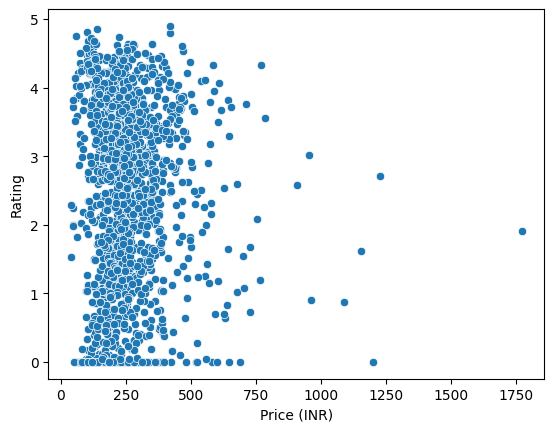

In [7]:
sns.scatterplot(x='Price (INR)',y='Rating', data=ind_data)
plt.show()

##### Real life application of the synthetic data
Swiggy charges 18 - 20% on each item ordered from the restaurant.This means 20% of every item price shown on swiggy goes to swiggy and it is not the original price.Therefore we create two more columns: Swiggy price, Original price, Charges.

In [9]:
#We shall use the copied dataset
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Restaurant Name  197430 non-null  object 
 3   Location         197430 non-null  object 
 4   Category         197430 non-null  object 
 5   Dish Name        197430 non-null  object 
 6   Swiggy Price     197430 non-null  float64
 7   Rating           197430 non-null  float64
 8   Rating Count     197430 non-null  int64  
 9   Original Price   197430 non-null  float64
 10  Charges          197430 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 16.6+ MB


In [6]:
copy.rename(columns={'Price (INR)':'Swiggy Price'},inplace=True)

In [7]:
#Create a function that gets original restaurant price
def get_original_price(price):  
    original = price * (100/120) # As the charges are 20%
    return np.round(original,1)
copy['Original Price'] = copy['Swiggy Price'].apply(get_original_price)


In [ ]:
#Here, we will be working with multiple column values in the function 
def get_charged_amount(row):
    charges = row['Swiggy Price']-row['Original Price']
    return charges
copy['Charges'] = copy[['Swiggy Price','Original Price']].apply(get_charged_amount,axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_12344\2842342887.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  charges = row[0]-row[1]


In [8]:
copy['Charges'] = copy['Swiggy Price'] - copy['Original Price']

In [10]:
copy.head()

,State,City,Restaurant Name,Location,Category,Dish Name,Swiggy Price,Rating,Rating Count,Original Price,Charges
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0,111.6,22.3
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25,43.3,8.7
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48,97.5,19.5
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65,54.2,10.8
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0,108.3,21.7


In [13]:
#Let's check at charges paid by each restaurant for orders through Swiggy
#For simplicity let us work on a single city's data
bang_copy = copy[copy['City'] == 'Bengaluru']
bang_copy.sample(5)

,State,City,Restaurant Name,Location,Category,Dish Name,Swiggy Price,Rating,Rating Count,Original Price,Charges
42,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,North Indian Rice,Veg Biriyani,195.0,4.2,22,162.5,32.5
63632,Karnataka,Bengaluru,Kanti Sweets,Yelahanka New,Breads,Plain Bread,52.0,4.3,16,43.3,8.7
5827,Karnataka,Bengaluru,Sweet Truth - Cake and Desserts,Whitefield,Beverages,Coca Cola Bottle (475 mL),66.5,4.6,2,55.4,11.1
2243,Karnataka,Bengaluru,LunchBox Meals and Thalis,Kengeri Satellite Town,Chapati Lunchbox,"Chicken Kheema, Chapati Lunchbox with Gulab Ja...",259.0,4.1,1,215.8,43.2
8680,Karnataka,Bengaluru,Olio - The Wood Fired Pizzeria,J P Nagar,Krispy Kreme Doughnuts and Coffee,Iced Americano,80.0,0.0,0,66.7,13.3
